In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

In [2]:
# Import diabetes dataset
df = pd.read_csv("CECS456-FinalProject/diabetes_data_upload.csv")
display(df)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
# Step 1: Understand dataset

# Number of rows and columns
df.shape

(520, 17)

In [4]:
# First 5 rows of dataset
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# List of all Dataset Variables
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
# Number of unique values for each variable
# Note: Everything except Age is a binary categorical variable 
df.nunique(axis=0)

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [7]:
# Dataset stats
# Age is only numerical variable
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [8]:
# Step 2: Clean/Prepare dataset

# Check for null variables
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [9]:
# Convert binary categories used in dataset into Int (1,0)
category_mappings = {'Female':1, 'Male':0, 'Yes':1, 'No':0, 'Positive':1, 'Negative':0}
df_toInt = df.iloc[:, 1:17]
df = df.iloc[:, 0:1]
for column in df_toInt:
    df_toInt[column] = df_toInt[column].map(category_mappings)
df = df.join(df_toInt)
display(df)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


<AxesSubplot: >

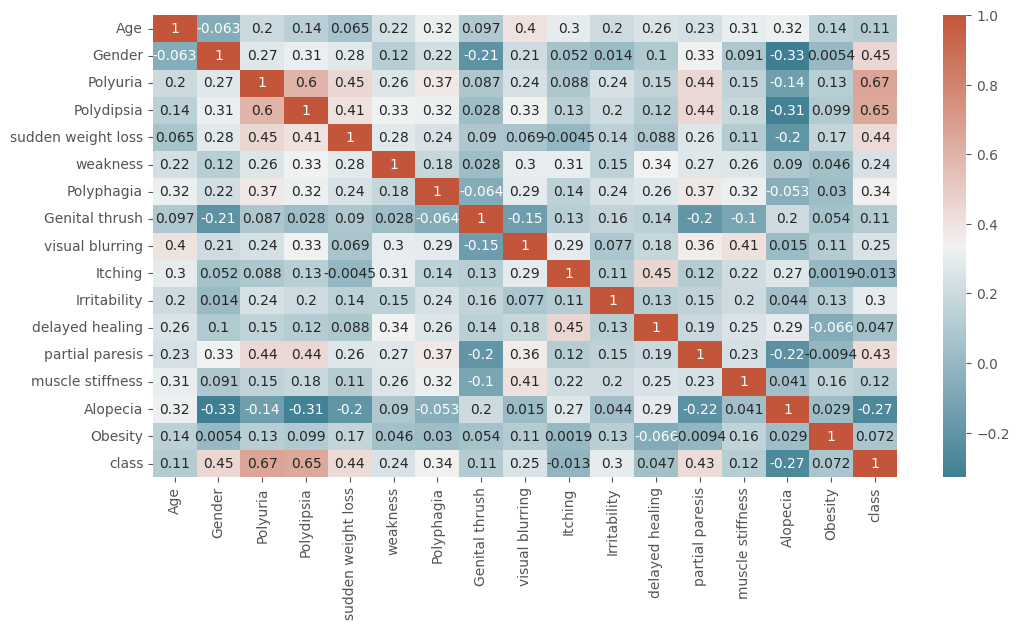

In [10]:
# Step 3: Relationship Analysis

# Calculate correlation matrix and plot
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap=sns.diverging_palette(220, 20,as_cmap=True))

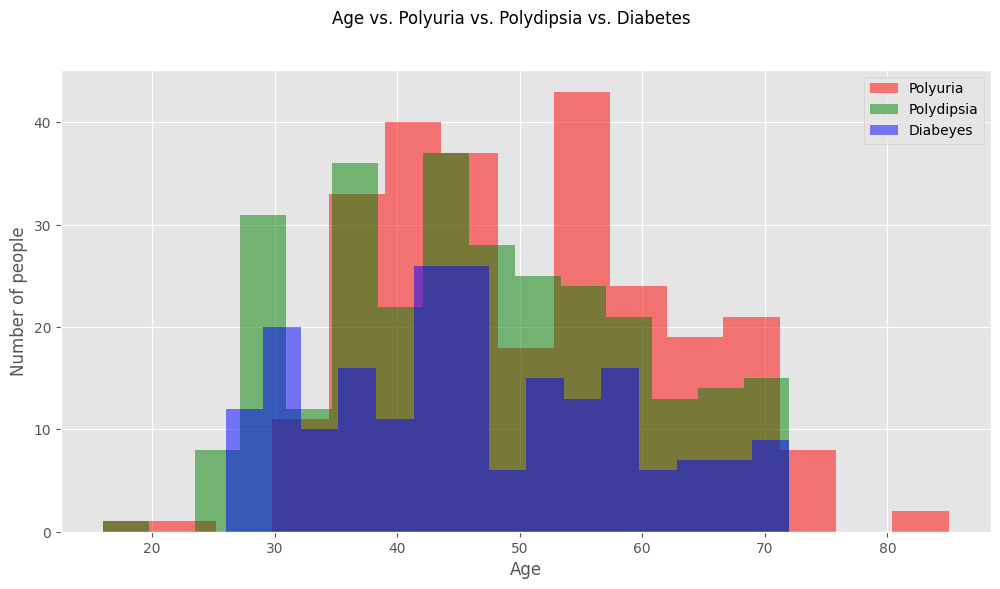

In [11]:
# Multiple Histogram
fig, ax = plt.subplots()
ax.hist(df[df['Polyuria']==1]['Age'], bins=15, alpha=0.5, color='red', label='Polyuria')
ax.hist(df[df['Polydipsia']==0]['Age'], bins=15, alpha=0.5, color='green', label='Polydipsia')
ax.hist(df[df['class']==0]['Age'], bins=15, alpha=0.5, color='blue', label='Diabeyes')
ax.set_xlabel('Age')
ax.set_ylabel('Number of people')
fig.suptitle("Age vs. Polyuria vs. Polydipsia vs. Diabetes")
ax.legend()

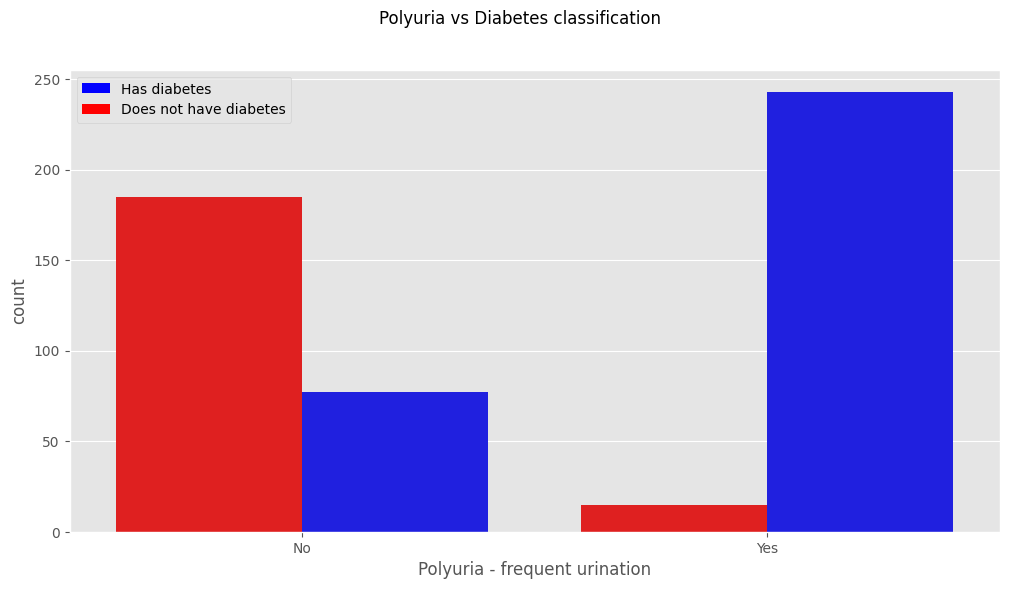

In [12]:
# Grouped bar chart: Polyuria vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='Polyuria', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("Polyuria - frequent urination")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
fig.suptitle("Polyuria vs Diabetes classification");

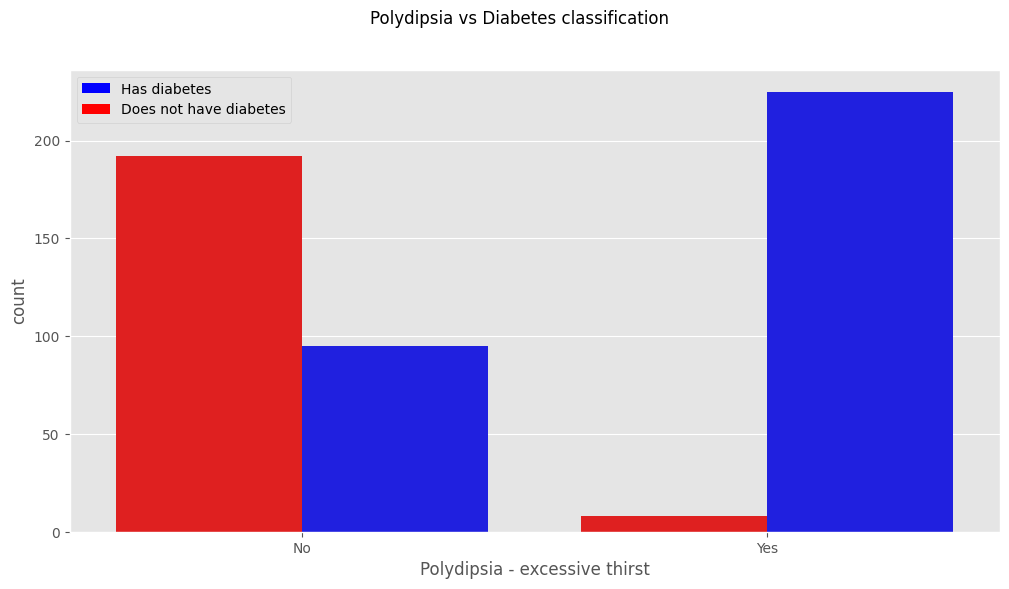

In [13]:
# Grouped bar chart: Polydipsia vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='Polydipsia', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("Polydipsia - excessive thirst")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
fig.suptitle("Polydipsia vs Diabetes classification");

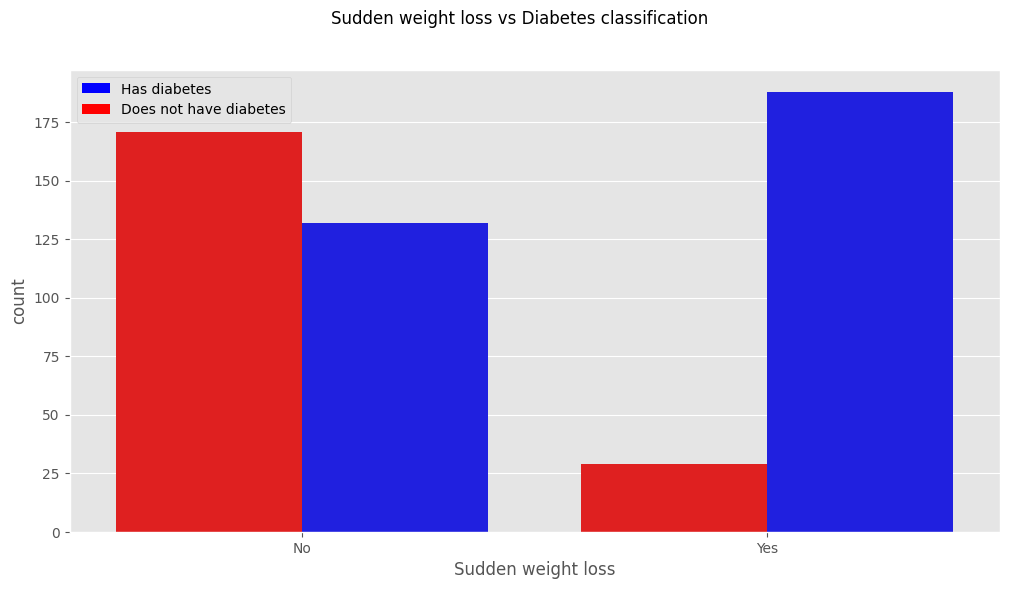

In [14]:
# Grouped bar chart: sudden weight loss vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='sudden weight loss', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("Sudden weight loss")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
fig.suptitle("Sudden weight loss vs Diabetes classification");

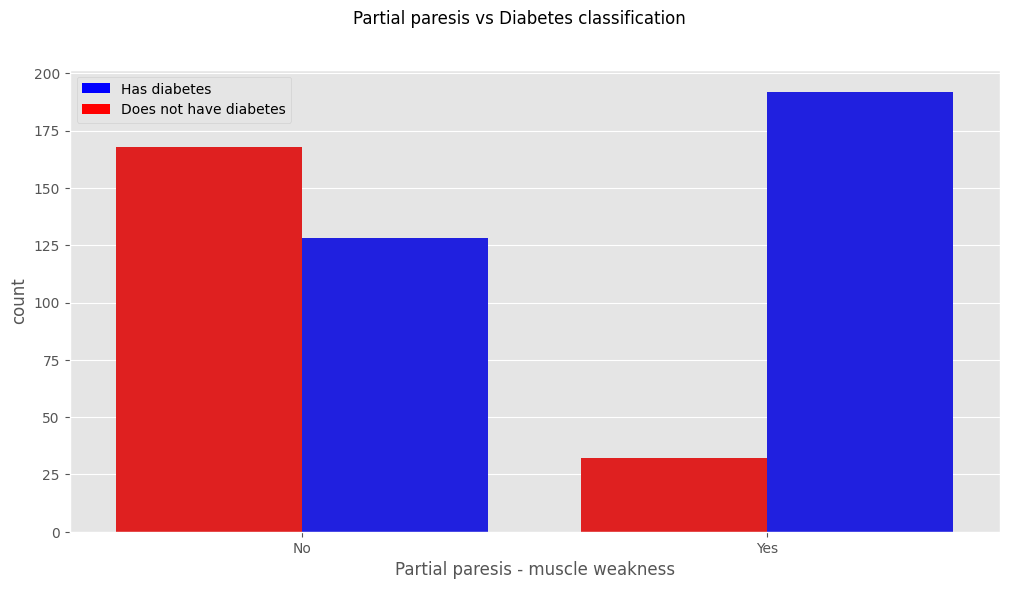

In [15]:
# Grouped bar chart: Partial paresis vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='partial paresis', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("Partial paresis - muscle weakness")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
fig.suptitle("Partial paresis vs Diabetes classification");

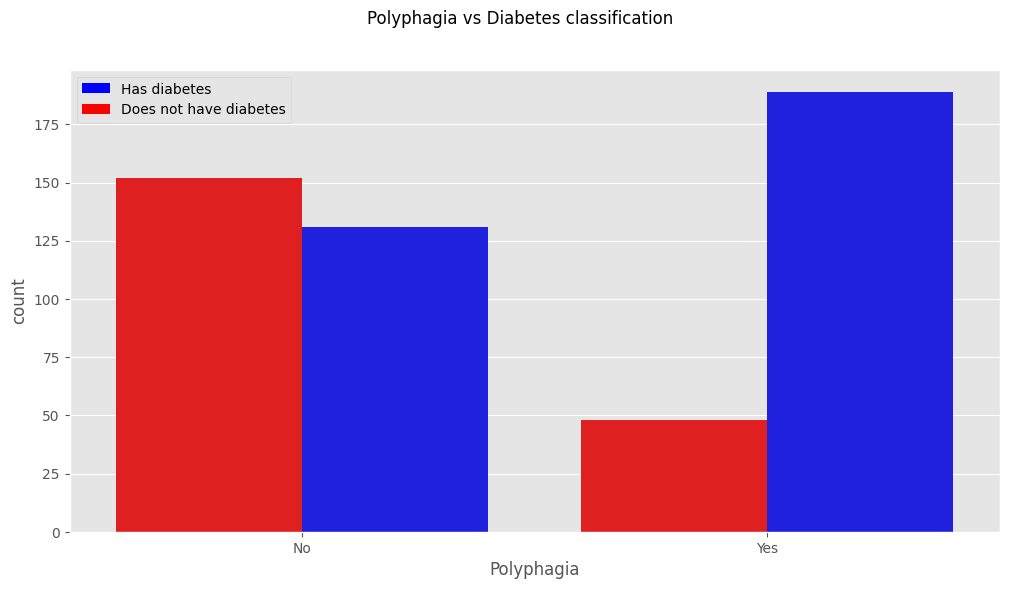

In [16]:
# Grouped bar chart: Polyphagia vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='Polyphagia', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("Polyphagia")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
fig.suptitle("Polyphagia vs Diabetes classification");

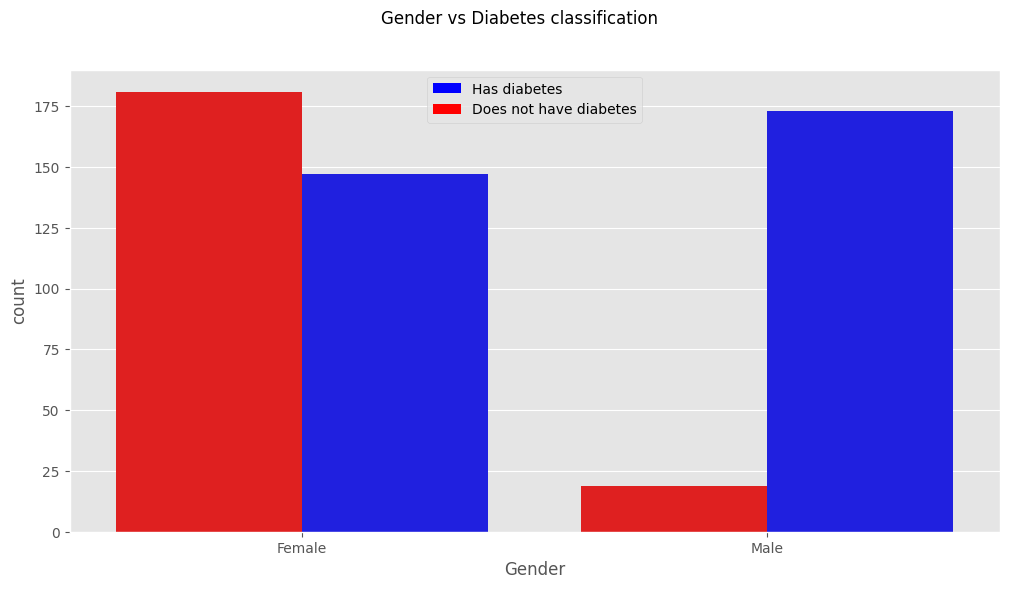

In [17]:
# Grouped bar chart: Gender vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='Gender', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("Gender")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['Female', 'Male']
ax.set_xticklabels(labels)
fig.suptitle("Gender vs Diabetes classification");

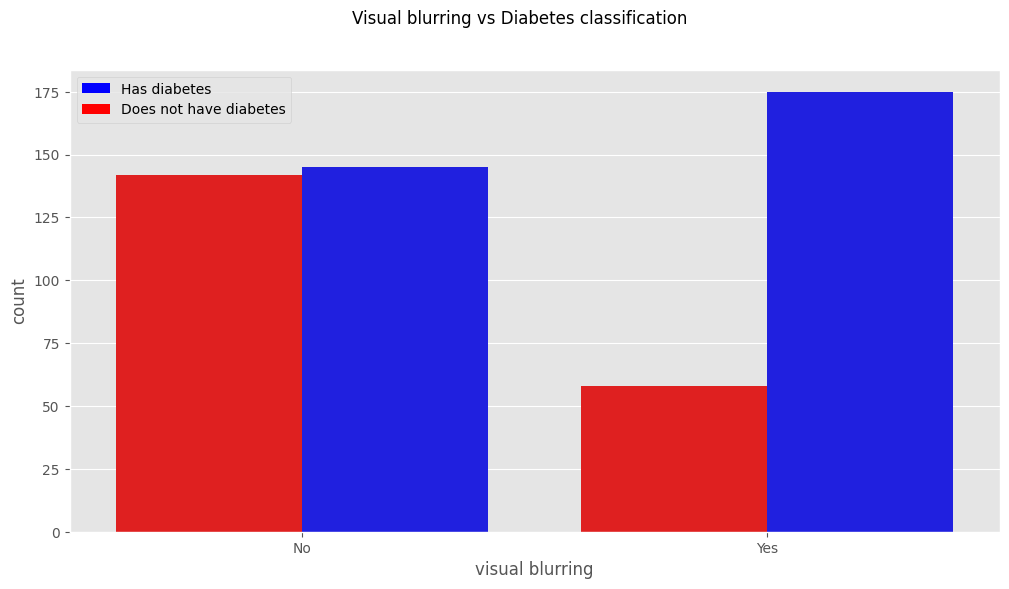

In [18]:
# Grouped bar chart: Visual blurring vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='visual blurring', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("visual blurring")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
fig.suptitle("Visual blurring vs Diabetes classification");

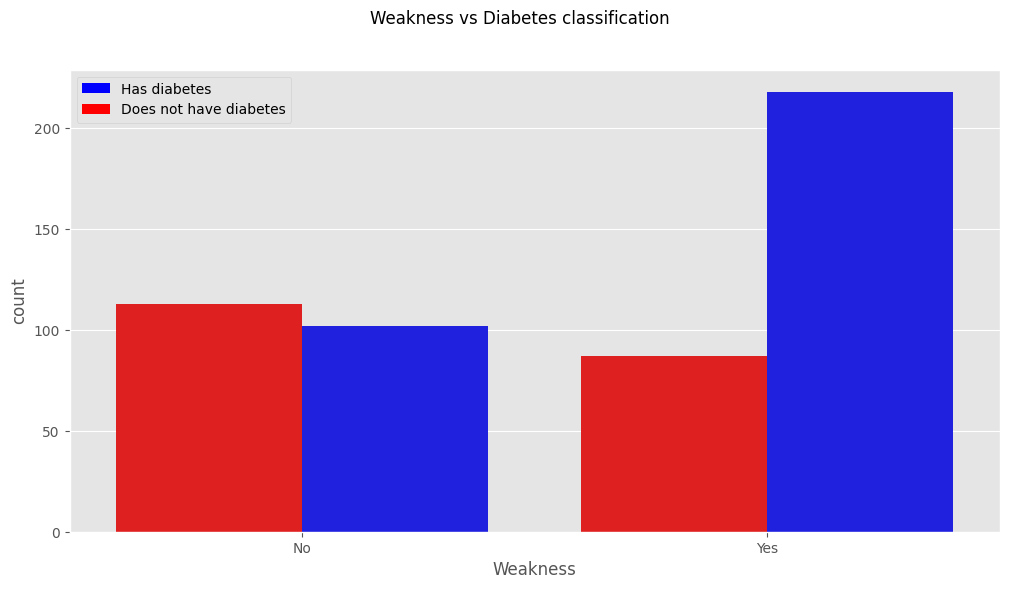

In [19]:
# Grouped bar chart: Weakness vs. Diabetes
fig, ax = plt.subplots()
sns.countplot(data=df, x='weakness', hue='class', palette={1:'blue', 0:'red'})
plt.close(2) # catplot creates an extra figure
ax.set_xlabel("Weakness")
legend_styling = [
    Patch(facecolor='blue', label='Has diabetes'),
    Patch(facecolor='red', label='Does not have diabetes'),
]
ax.legend(handles=legend_styling)
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
fig.suptitle("Weakness vs Diabetes classification");

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25016314-3530-47b7-95b2-7fd0d302b441' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>